#📌 Extracão

In [32]:
# importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url_csv = 'https://raw.githubusercontent.com/devFari/Challenge_Telecom_X/refs/heads/main/TelecomX_Data.json'

In [33]:
df = pd.read_json(url_csv)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [34]:
# normalizando
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        normalized = pd.json_normalize(df[col])
        df = pd.concat([df.drop(columns=[col]), normalized], axis=1)

In [35]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [36]:
# Remover duplicatas e valores nulos
df = df.drop_duplicates()
df = df.dropna()

In [37]:
# Adicionar a coluna "Contas_Diarias" = Charges.Monthly / 30
df['Contas_Diarias'] = df['Charges.Monthly'] / 30

In [10]:
#for coluna in df.columns:
#    if df[coluna].dtype == 'object':
#        df[coluna] = df[coluna].str.lower()

#df

In [38]:
df


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [10]:
# variavel coom a distribuição dos generos
genero = df['gender'].value_counts()

novos_rotulos_genero = {
    'Male': 'Homens',
    'Female': 'Mulheres',
}

genero_renomeado = genero.rename(index=novos_rotulos_genero)

explode_values_genero = [0] * len(genero_renomeado)

if 'Homens' in genero_renomeado.index:
    idx_homens = genero_renomeado.index.get_loc('Homens')
    explode_values_genero[idx_homens] = 0.1

In [11]:
#calculo dos tipo sde contrato
contratos = df['Contract'].value_counts()

novos_rotulos_contratos = {
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal'
}

contratos_renomeados = contratos.rename(index=novos_rotulos_contratos)

explode_values_contratos = [0] * len(contratos_renomeados)

if 'Mensal' in contratos_renomeados.index:
    idx_mensal = contratos_renomeados.index.get_loc('Mensal')
    explode_values_contratos[idx_mensal] = 0.1


In [12]:
#calculo dos tipo sde contrato
clientes = df['Churn'].value_counts()

novos_rotulos_clientes = {
    'Yes': 'deixou de ser Cliente',
    'No': 'Ainda é Cliente',
    '': 'Não informado'
}

clientes_renomeados = clientes.rename(index=novos_rotulos_clientes)

explode_values_clientes = [0] * len(clientes_renomeados)

if 'deixou de ser Cliente' in clientes_renomeados.index:
    idx_ja_foi = clientes_renomeados.index.get_loc('deixou de ser Cliente')
    explode_values_clientes[idx_ja_foi] = 0.1

#📊 Carga e análise

In [ ]:
# Plotar o gráfico de pizza Distribuição de Gênero dos Clientes
plt.figure(figsize=(8, 8))
plt.pie(
    genero_renomeado,
    labels=genero_renomeado.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#5271ff', '#ff66c4'],
    explode=explode_values_genero,
    shadow=True
)

plt.title('Distribuição de Gênero dos Clientes', fontsize=16)
plt.axis('equal')

plt.show()

In [ ]:
# Plotar o gráfico de pizza Distribuição dos Tipos de Contrato
plt.figure(figsize=(8, 8))

plt.pie(
    contratos_renomeados,
    labels=contratos_renomeados.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#004aad', '#ff3131', '#00bf63'],
    explode=explode_values_contratos,
    shadow=True
)

plt.title('Distribuição dos Tipos de Contrato', fontsize=16)

plt.axis('equal')

plt.show()

In [ ]:
# Plotar o gráfico de pizza Taxa de Retenção e Churn da Base de Clientes
plt.figure(figsize=(8, 8))
plt.pie(
    clientes_renomeados,
    labels=clientes_renomeados.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#00bf63', '#ff3131', '#0097b2'],
    explode=explode_values_clientes,
    shadow=True
)

plt.title('Taxa de Retenção e Churn da Base de Clientes', fontsize=16)

plt.axis('equal')

plt.show()

In [ ]:
def plot_churn_by_category_on_ax(dataframe, column, title, xlabel, ax, index_labels_map=None, title_pad=15, colors_palette='viridis'):

    churn_rate = dataframe.groupby(column)['Churn_Numeric'].mean() * 100
    churn_rate = churn_rate.sort_values(ascending=False)

    if index_labels_map:
        churn_rate = churn_rate.rename(index=index_labels_map)

    sns.barplot(x=churn_rate.index, y=churn_rate.values, hue=churn_rate.index, palette=colors_palette, legend=False, ax=ax)

    ax.set_title(title, fontsize=14, pad=title_pad)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel('Porcentagem de Churn (%)', fontsize=10)
    ax.set_ylim(0, 100)

    for index, value in enumerate(churn_rate.values):
        ax.text(index, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)



fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

gender_labels_map = {'Male': 'Homens', 'Female': 'Mulheres'}
partner_labels_map = {'Yes': 'Com Parceiro(a)', 'No': 'Sem Parceiro(a)'}
dependents_labels_map = {'Yes': 'Com Dependentes', 'No': 'Sem Dependentes'}

plot_churn_by_category_on_ax(df, 'gender', 'Taxa de Churn por Gênero', 'Gênero', axs[0],
                             index_labels_map=gender_labels_map, title_pad=20,
                             colors_palette=['#ff66c4' , '#5271ff'])

plot_churn_by_category_on_ax(df, 'SeniorCitizen_Label', 'Taxa de Churn por Senioridade', 'Senioridade do Cliente', axs[1],
                             title_pad=20, colors_palette=['#7ed957', '#d62728'])

plot_churn_by_category_on_ax(df, 'Partner', 'Taxa de Churn: Clientes com/sem Parceiro(a)', 'Possui Parceiro(a)', axs[2],
                             index_labels_map=partner_labels_map, title_pad=20,
                             colors_palette=['#7ed957', '#8c52ff'])

plot_churn_by_category_on_ax(df, 'Dependents', 'Taxa de Churn: Clientes com/sem Dependentes', 'Possui Dependentes', axs[3],
                             index_labels_map=dependents_labels_map, title_pad=20,
                             colors_palette=['#004aad', '#7ed957'])

plt.tight_layout()
plt.show()

In [ ]:
# --- PASSO 2: Calcular a quantidade de clientes para cada combinação ---

# Coluna 01: Clientes sem Partner e sem Dependents
count_no_partner_no_dependents = df[(df['Partner'] == 'No') & (df['Dependents'] == 'No')].shape[0]

# Coluna 02: Clientes sem Partner e com Dependents
count_no_partner_yes_dependents = df[(df['Partner'] == 'No') & (df['Dependents'] == 'Yes')].shape[0]

# Coluna 03: Clientes com Partner e sem Dependents
count_yes_partner_no_dependents = df[(df['Partner'] == 'Yes') & (df['Dependents'] == 'No')].shape[0]

# Coluna 04: Clientes com Partner e com Dependents
count_yes_partner_yes_dependents = df[(df['Partner'] == 'Yes') & (df['Dependents'] == 'Yes')].shape[0]

# --- PASSO 3: Preparar os dados para o gráfico ---

# Criar uma série Pandas para facilitar a plotagem
data_for_plot = pd.Series(
    [count_no_partner_no_dependents,
     count_no_partner_yes_dependents,
     count_yes_partner_no_dependents,
     count_yes_partner_yes_dependents],
    index=['Sem Parceiro\nSem Dependentes',
           'Sem Parceiro\nCom Dependentes',
           'Com Parceiro\nSem Dependentes',
           'Com Parceiro\nCom Dependentes']
)

# --- PASSO 4: Plotar o gráfico de barras ---

plt.figure(figsize=(10, 6)) # Define o tamanho da figura

# Crie o gráfico de barras
# Como estamos plotando uma Series, o index vai para o eixo X e os values para o eixo Y
sns.barplot(x=data_for_plot.index, y=data_for_plot.values, hue=data_for_plot.index, palette='mako', legend=False)

# Adicionar título e rótulos
plt.title('Distribuição de Clientes por Status de Parceiro e Dependentes', fontsize=16, pad=20)
plt.xlabel('Combinação Parceiro/Dependentes', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Adicionar os valores numéricos em cima das barras
for index, value in enumerate(data_for_plot.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10) # Ajuste +0.5 para espaçamento

plt.xticks(rotation=15, ha='right') # Rotaciona os rótulos do eixo X para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade no eixo Y
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

<ipython-input-53-1328409619>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges_by_contract.values, y=charges_by_contract.index,
<ipython-input-53-1328409619>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values,
<ipython-input-53-1328409619>:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
<ipython-input-53-1328409619>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` fo

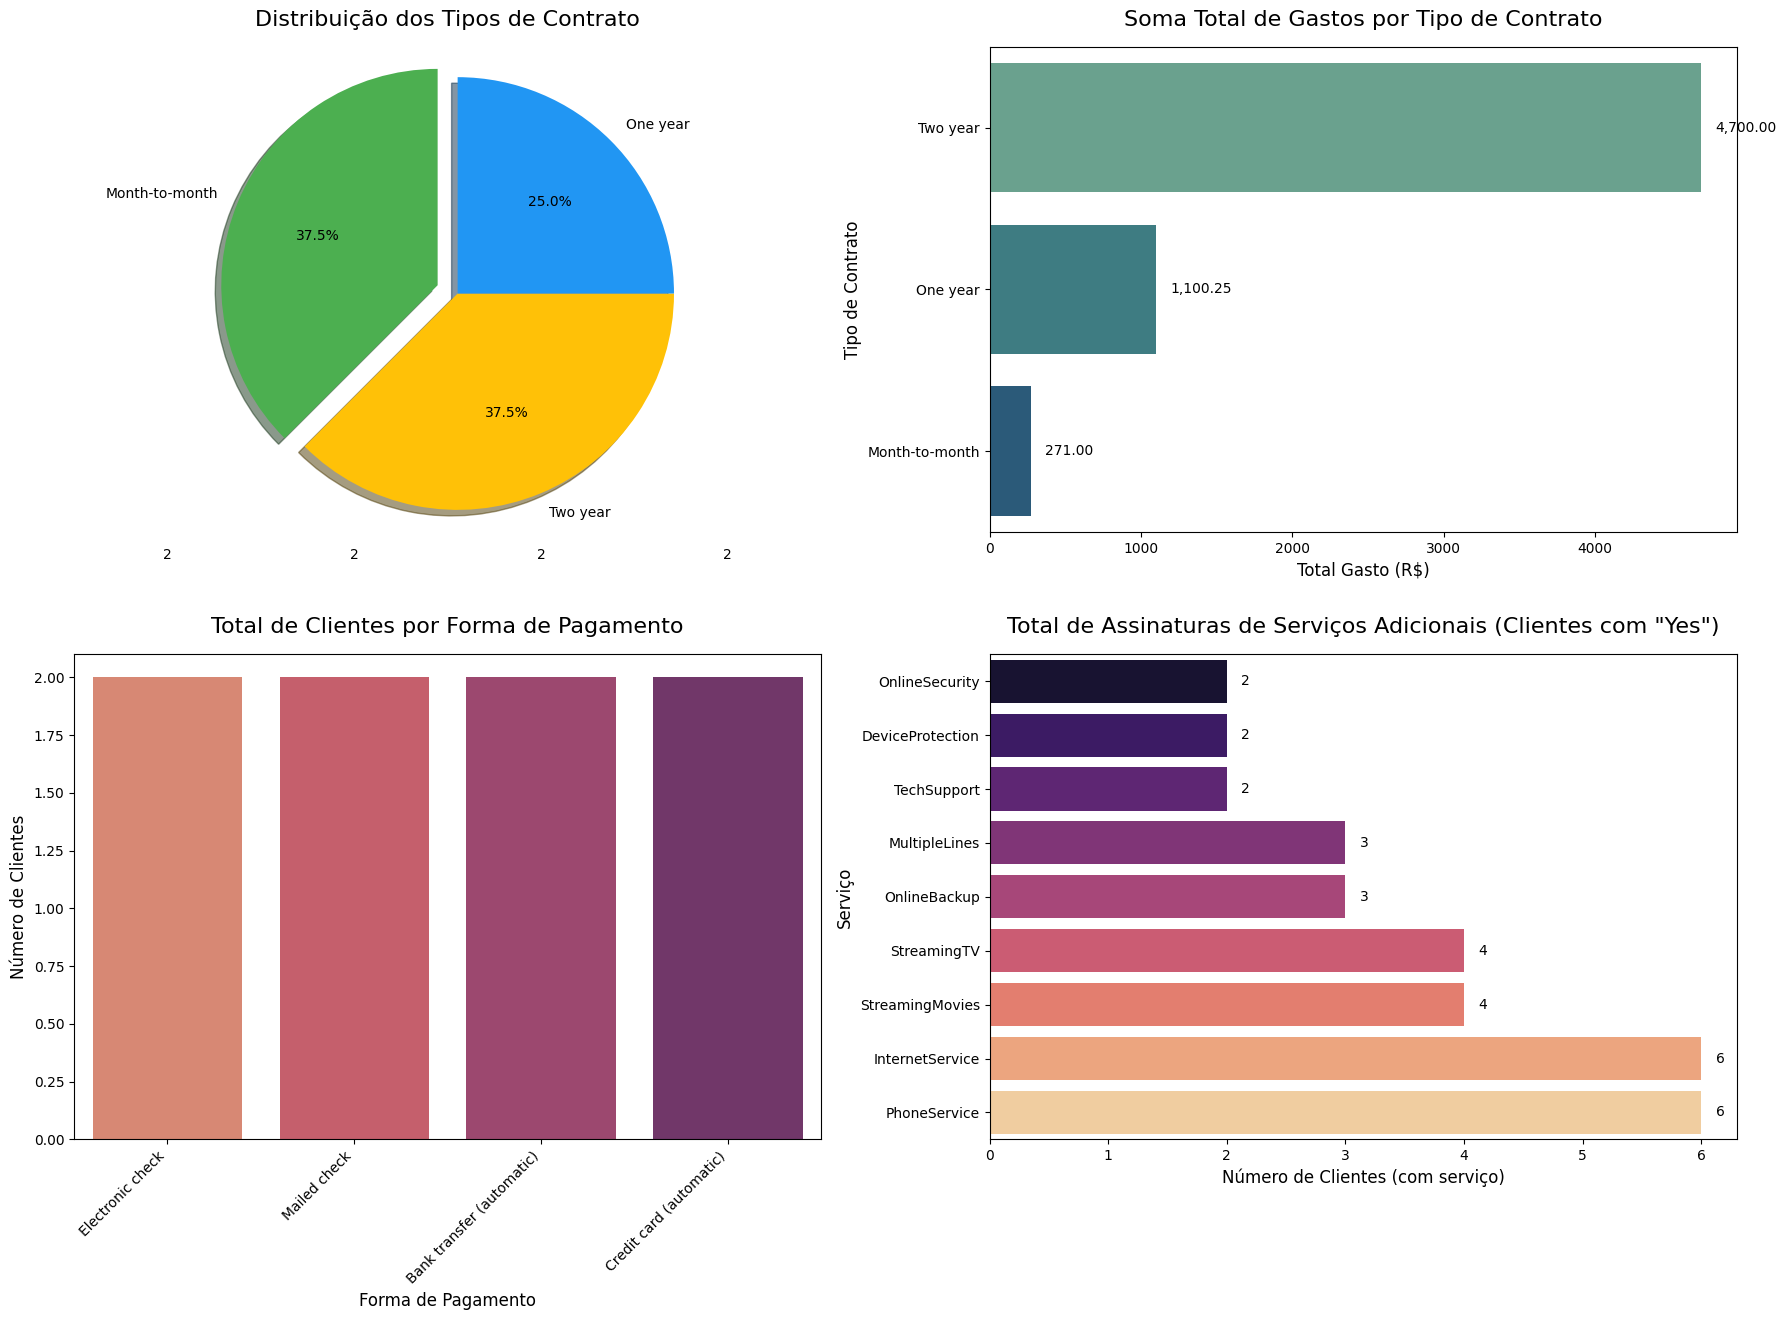

In [53]:
df_tratado = pd.DataFrame(df)

# Se 'Charges.Total' for string, converta para numérico. Erros serão coercidos para NaN.
# Usando df_tratado
df_tratado['Charges.Total'] = pd.to_numeric(df_tratado['Charges.Total'], errors='coerce')
# Remova NaN, se houver, para os cálculos de soma
# Usando df_tratado
df_tratado.dropna(subset=['Charges.Total'], inplace=True)


# --- PASSO 2: Criar a figura com 2 linhas e 2 colunas de subplots ---
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
axs = axs.flatten()

# --- GRÁFICO (0,0): Pizza de `Contract` ---
# Usando df_tratado
contratos_counts = df_tratado['Contract'].value_counts()

explode_values = [0] * len(contratos_counts)
if 'Month-to-month' in contratos_counts.index:
    idx_month_to_month = contratos_counts.index.get_loc('Month-to-month')
    explode_values[idx_month_to_month] = 0.1

pie_colors = ['#4CAF50', '#FFC107', '#2196F3']

axs[0].pie(
    contratos_counts,
    labels=contratos_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode_values,
    colors=pie_colors,
    shadow=True,
    textprops={'fontsize': 10}
)
axs[0].set_title('Distribuição dos Tipos de Contrato', fontsize=16, pad=15)
axs[0].axis('equal')


# --- GRÁFICO (0,1): Barra Horizontal de `Charges.Total` por `Contract` ---
# Usando df_tratado
charges_by_contract = df_tratado.groupby('Contract')['Charges.Total'].sum().sort_values(ascending=False)

sns.barplot(x=charges_by_contract.values, y=charges_by_contract.index,
            palette='crest', ax=axs[1])
axs[1].set_title('Soma Total de Gastos por Tipo de Contrato', fontsize=16, pad=15)
axs[1].set_xlabel('Total Gasto (R$)', fontsize=12)
axs[1].set_ylabel('Tipo de Contrato', fontsize=12)
axs[1].ticklabel_format(style='plain', axis='x')

for index, value in enumerate(charges_by_contract.values):
    axs[1].text(value + (charges_by_contract.max() * 0.02), index, f'{value:,.2f}',
                va='center', ha='left', fontsize=10)


# --- GRÁFICO (1,0): Barra Vertical de `PaymentMethod` (contagem total) ---
# Usando df_tratado
payment_counts = df_tratado['PaymentMethod'].value_counts()

sns.barplot(x=payment_counts.index, y=payment_counts.values,
            palette='flare', ax=axs[2])
axs[2].set_title('Total de Clientes por Forma de Pagamento', fontsize=16, pad=15)
axs[2].set_xlabel('Forma de Pagamento', fontsize=12)
axs[2].set_ylabel('Número de Clientes', fontsize=12)

labels = axs[2].get_xticklabels()
axs[2].set_xticklabels(labels, rotation=45, ha='right', fontsize=10)

for index, value in enumerate(payment_counts.values):
    axs[2].text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)


# --- GRÁFICO (1,1): Barra Horizontal da Soma de Serviços Adicionais ('Yes') ---
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

services_counts = pd.Series(dtype=int)
for col in service_columns:
    # Usando df_tratado
    if df_tratado[col].dtype == 'object' and df_tratado[col].isin(['Yes', 'No']).all():
        services_counts[col] = df_tratado[col].map({'Yes': 1, 'No': 0}).sum()
    elif col == 'InternetService':
        # Usando df_tratado
        services_counts['InternetService'] = df_tratado['InternetService'].isin(['Fiber optic', 'DSL']).sum()

services_counts = services_counts.sort_values(ascending=True)

sns.barplot(x=services_counts.values, y=services_counts.index,
            palette='magma', ax=axs[3])
axs[3].set_title('Total de Assinaturas de Serviços Adicionais (Clientes com "Yes")', fontsize=16, pad=15)
axs[3].set_xlabel('Número de Clientes (com serviço)', fontsize=12)
axs[3].set_ylabel('Serviço', fontsize=12)
for index, value in enumerate(services_counts.values):
    axs[3].text(value + (services_counts.max() * 0.02), index, str(value),
                va='center', ha='left', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

#📄Relatorio Final